In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path
%matplotlib inline

In [2]:
# Read data
data = pd.read_csv('Task4DataSet/01_train.csv')

In [3]:
test_data = pd.read_csv('Task4DataSet/01_test.csv')

In [4]:
def normalize(data):
    data = data.T
    data = np.array(data)
    mean_std = {'mean': [],
                'std': [] }
    normalized_data = []
    for values in data:
        if np.max(values) == np.min(values):
            continue
        normalized_data.append((values - np.mean(values)) / ( np.std(values) if np.std(values) else 1e-5))
        mean_std['mean'].append(np.mean(values))
        mean_std['std'].append(np.std(values))
    
    normalized_data = pd.DataFrame(normalized_data)
    return normalized_data.T, mean_std

        
        

In [5]:
# def normalize_with_mean_and_std(data, mean_std_dict):
#     data = data.T
#     data = np.array(data)
#     print(data.shape, len(mean_std_dict['mean']))
#     normalized_data = []
#     for i,values in enumerate(data):
#         normalized_data.append( (values - mean_std_dict['mean'][i]) / mean_std_dict['std'][i])
    
#     normalized_data = pd.DataFrame(normalized_data)
#     return normalized_data.T
    

In [6]:
data , std= normalize(data)

In [7]:
len(std)

2

In [8]:
data.insert(loc=0,column='x_0_1',value=np.ones(len(data))) 
data = data.dropna(axis=1, how='all')
test_data = data.dropna(axis=1, how='all')
# test_data.insert(loc=0,column='1',value=np.ones(len(test_data))) 

In [9]:
# test_data = normalize_with_mean_and_std(test_data, std)

In [10]:
print(test_data.shape)

(125, 10)


In [11]:
print(data.shape)

(125, 10)


In [12]:
data.head()

,x_0_1,0,1,2,3,4,5,6,7,8
0,1.0,0.844022,-2.944584,0.348570,2.946333,-2.947586,0.122679,2.921191,-0.645287,-2.825998
1,1.0,-1.053046,-2.583094,-1.282392,2.579652,-2.589218,-0.299825,2.701043,-1.378472,-2.456031
2,1.0,0.651369,-2.088489,0.091610,2.089876,-2.086093,-0.670203,2.085466,0.595845,-2.129688
3,1.0,0.550064,-1.611664,-1.599439,1.612865,-1.612498,0.291253,1.754946,-0.164966,-1.935061
4,1.0,1.103207,-2.048284,0.888575,2.050932,-2.039711,-0.509452,1.975679,2.032775,-1.930609


In [13]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [14]:
X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:,-1]

In [15]:
# Generating Coefficients
B = np.zeros(len(X.columns))
print(B)
X = np.array(X)
Y = np.array(Y)
print(X.dtype)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
float64


In [16]:
# HyperParameters 
learning_rate = 0.01
regularization_parameter = 1e-15 # 0.01

In [17]:
# Defining Cost function
cost_function = lambda X,Y,B: np.sum(np.square(X.dot(B) - Y)) / (2.0 * len(Y))

In [18]:
initial_cost = cost_function(X,Y,B)
print(initial_cost)

0.49999999999999983


In [19]:
# Writing Gradient Descent with L2 Ridge Regularization

def gradient_descent(X, Y, B, learning_rate, epochs,regularization_parameter):
    
    cost_history = []
    size = len(Y)
    for i in range(epochs):
        h = X.dot(B)
        loss = h - Y  - ( regularization_parameter / (2 * size) ) * np.sum(np.square(B))
        gradient = X.T.dot(loss) / size
        B = B - learning_rate * gradient# Lasso Regression - regularization_parameter*np.sign(B)
        # B[B < 1e-16] = 0     when lasso regression
        cost = cost_function(X,Y,B)
        if i % 10 == 0:
            cost_history.append(cost)
  
    return B, cost_history
    

In [20]:
X.shape, Y.shape, B.shape

((125, 9), (125,), (9,))

In [21]:
newB, cost_history = gradient_descent(X, Y, B, learning_rate, 1000, regularization_parameter)

In [22]:
newB.shape

(9,)

In [23]:
def update_B(B, std):
    std_ = np.array(std['std'])
    mean_ = np.array(std['mean'])
    B[1:] = B[1:] / std_[:-1]
    B[0] = B[0] - np.sum( ( B[1:] * mean_[:-1] ) / std_[:-1] )
    
    return B

In [24]:
newB = update_B(newB, std)

In [25]:
X_test.shape

(125, 9)

In [26]:
newB

array([ 3.97041811e-06, -2.73768479e-08,  1.52610607e-07,  3.17738981e-07,
       -2.62026216e-07,  1.66179261e-07,  7.37855516e-10, -1.36468261e-07,
       -1.14602806e-06])

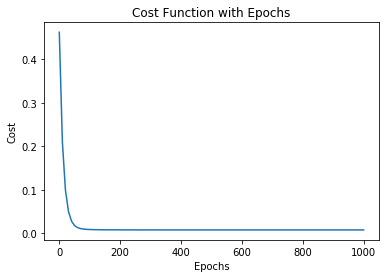

In [27]:
a = np.linspace(0,1000,100)
plt.plot(a, cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function with Epochs')
plt.show()

In [28]:
def rmse(Y, Y_pred):
    s = np.array(Y - Y_pred)
    s = np.array(s**2)
    s = np.sum(s)/ len(Y)
    return s

In [29]:
# # Predict Function : 
# def predict(X, B ,std):
#     X = X.T
#     new_X = []
#     for i,column in enumerate(X):
#         if i != 1:
#             new_X.append( (column - std['mean'][i]) / std['std'][i] )
        
#     new_X = np.array(new_X).T
#     return new_X.dot(B)

In [30]:
# Y_pred =  predict(X_test, newB, std )

In [31]:
Y_pred = X_test.dot(newB)

In [32]:
print(rmse(Y_test, Y_pred))

0.9999985011254813


Alternate Method

In [33]:
def method_of_regularized_least_squares(X_, Y_):
    # Regularized Least Squares
    L = 0.1
    CX = X_.T.dot(X_)
    B_ = (np.linalg.inv(CX + L * np.identity(len(CX)))).dot(X_.T.dot(Y_))

    return B_

In [34]:
B = method_of_regularized_least_squares(X, Y)

In [39]:
Y_pred = X_test.dot(B)

In [40]:
print(rmse(Y_test, Y_pred))

0.016133944358760883
